### IS

In [2]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

methods = ["basic", "moment20", "filter10", "copula20", "copula-filter10", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]
#num_scenarios = [10, 50, 100]
#methods = ["copula-filter10", "copula-filter100", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]
#methods = ["copula-filter5", "copula-filter10", "copula-filter25", "copula-filter100"]
num_scenarios = [100]

final_rows = []

for ns in num_scenarios:
    for method in methods:
        base_folder = f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}"

        rows = []

        if method in ["copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"] and ns not in [100]:
            continue

        for i in range(1, 31):
            objective_value_path = base_folder + "/" + str(i) + "/results_objective.csv"
            df_obj_value = pd.read_csv(objective_value_path)
            obj_value = float(df_obj_value.columns[0].split(":")[1])
            rows.append({"instance": i, "obj_value": obj_value})

        df = pd.DataFrame(rows)
        mean_value = df['obj_value'].mean()
        std_value = df['obj_value'].std()
        rel_std = std_value / mean_value * 100 # %

        final_rows.append({"method": f"{method}_sce{ns}", "obj_value_mean": mean_value, "obj_value_std": std_value, "rel_std (%)": rel_std})

result_df = pd.DataFrame(final_rows)
result_df

,method,obj_value_mean,obj_value_std,rel_std (%)
0,basic_sce100,1.430104e+12,6.991673e+09,0.488893
1,moment20_sce100,1.433287e+12,8.095171e+09,0.564798
2,filter10_sce100,1.422895e+12,1.218468e+10,0.856331
3,copula20_sce100,1.434180e+12,8.229374e+09,0.573803
4,copula-filter10_sce100,1.454292e+12,6.108719e+09,0.420047
5,copula-filter-wind10_sce100,1.433663e+12,5.822070e+09,0.406098
6,copula-filter-solar10_sce100,1.450187e+12,7.820025e+09,0.539242
7,copula-filter-combo10_sce100,1.454969e+12,5.059667e+09,0.347751


### OOS

In [3]:
methods = ["basic", "moment20", "filter10", "copula20", "copula-filter10", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]
#num_scenarios = [10, 50, 100]

#methods = ["copula-filter5", "copula-filter10", "copula-filter25", "copula-filter100"]
num_scenarios = [100]


final_rows = []

for ns in num_scenarios:
    for method in methods:
        base_folder = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(ns)}"

        if method in ["copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"] and ns not in [100]:
            continue

        rows = []

        for i in range(1, 31):
            oos_value = 0
            num_trees_considered = 0
            for j in range(1, 11):
                try:
                    oos_value_path = base_folder + f"_{i}/oos_tree{j}/out_of_sample_values.csv"
                    df_oos_value = pd.read_csv(oos_value_path)
                    oos_tree_value = float(df_oos_value["Objective value"][0])
                    oos_value += oos_tree_value
                    num_trees_considered += 1
                except FileNotFoundError:
                    continue
            rows.append({"instance": i, "oos_value": oos_value / num_trees_considered})
            
        df = pd.DataFrame(rows)
        mean_value = df['oos_value'].mean()
        std_value = df['oos_value'].std()
        rel_std = std_value / mean_value * 100 # %

        final_rows.append({"method": f"{method}_sce{ns}", "oos_value_mean": mean_value, "oos_value_std": std_value, "rel_std (%)": rel_std})

result_df = pd.DataFrame(final_rows)
result_df

,method,oos_value_mean,oos_value_std,rel_std (%)
0,basic_sce100,1.454486e+12,1.786478e+10,1.228254
1,moment20_sce100,1.453194e+12,3.119148e+10,2.146408
2,filter10_sce100,1.455577e+12,5.590347e+10,3.840640
3,copula20_sce100,1.452335e+12,2.919367e+10,2.010120
4,copula-filter10_sce100,1.440867e+12,4.171857e+09,0.289538
5,copula-filter-wind10_sce100,1.453312e+12,1.938768e+10,1.334034
6,copula-filter-solar10_sce100,1.442156e+12,5.339758e+09,0.370262
7,copula-filter-combo10_sce100,1.443776e+12,4.459324e+09,0.308865


### Generator boxplots

In [4]:
SGR_TO_COLOR_AND_TEXT = {
    "basic": ["Basic", "#045275"],
    "moment20": ["Moment", "#089099"], 
    "filter10": ["Strata", "#7CCBA2"],
    "copula20": ["Copula-matching", "#FCDE9C"],
    "copula-filter10": ["Copula-strata", "#F0746E"], 
}

COPULA_CONFIGS_TO_COLOR_AND_TEXT = {
    "copula-filter10": ["Load", "#F0746E"],
    "copula-filter-wind10": ["Wind onshore", "#4169E1"],
    "copula-filter-solar10": ["Solar PV", "#FFD700"],
    "copula-filter-combo10": ["Load + Wind onshore + Solar PV", "#708090"]
}

CLUSTERS_TO_COLOR_AND_TEXT = {
    "copula-filter5": ["5", "#40E0D0"],
    "copula-filter10": ["10", "#F0746E"],
    "copula-filter25": ["25", "#800080"],
    "copula-filter100": ["100", "#DC143C"]
}

GENERATOR_TO_TEXT = {
    "Windonshore": "Wind onshore",
    "Windoffshore": "Wind offshore", 
    "Solar": "Solar PV",
    "Bio": "Bio",
    "Hydrorun-of-the-river": "Run-of-river hydropower"
}

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_73611/3833908761.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_73611/3833908761.py:58: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_73611/3833908761.py:58: F

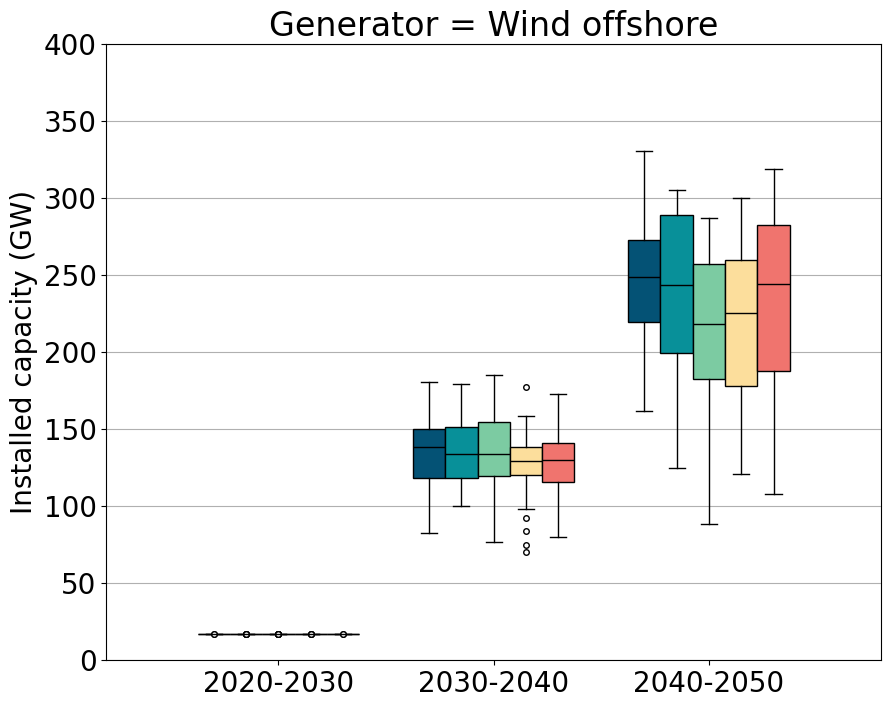

In [29]:
# All fossil types
FOSSIL_TYPES = ['Liginite existing',
'Lignite',
'Lignite CCS adv',
'Coal existing',
'Coal',
'Coal CCS adv',
'Gas existing',
'Gas OCGT',
'Gas CCGT',
'Gas CCS adv',
'Oil existing',
#'Bio existing',
#'Bio 10 cofiring',
#'Nuclear',
#'Bio',
#'Geo',
#'Bio 10 cofiring CCS',
'Lignite CCS sup',
'Coal CCS',
'Gas CCS']
#'Waste']

# Remove whitespace from strings in the list
FOSSIL_TYPES = [fossil.replace(" ", "") for fossil in FOSSIL_TYPES]

FOSSIL = False

genType = 'Windoffshore'
#methods = ["copula-filter5", "copula-filter10", "copula-filter25", "copula-filter100"]
methods = ["basic", "moment20", "filter10", "copula20", "copula-filter10"]
#methods = ["copula-filter10", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]

num_scenarios = 10

def get_dataframes(methods, num_scenarios):
    dataframes = []
    for method in methods: 
        dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}/{i}/results_output_gen.csv") for i in range(1, 31)])
    return dataframes

def aggregate_dataframes(dataframes):
    # Initialize empty DataFrames to store the aggregated installed capacity values for each method and period
    aggregated_data = pd.DataFrame(columns=['Period', 'genInstalledCap_MW'])

    # Iterate through the dataframes for method
    for df in dataframes:
        # Filter the dataframe for GeneratorType genType
        if FOSSIL:
            filtered_data = df[df['GeneratorType'].isin(FOSSIL_TYPES)]
        else: 
            filtered_data = df[df['GeneratorType'] == genType]
        
        # Group the filtered data by period and sum the installed capacity values within each group
        grouped_data = filtered_data.groupby('Period')['genInstalledCap_MW'].sum().reset_index()
        
        # Concatenate the grouped data with the aggregated DataFrame for Method 1
        aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
    
    # Convert MW to GW
    aggregated_data['genInstalledCap_GW'] = aggregated_data['genInstalledCap_MW'] / 1000
    return aggregated_data

all_dataframes = get_dataframes(methods, num_scenarios)
aggregated_dataframes = [aggregate_dataframes(dfs) for dfs in all_dataframes]
all_aggregated_data = [aggregated_data['genInstalledCap_GW'].groupby(aggregated_data['Period']).apply(list) for aggregated_data in aggregated_dataframes]

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Define positions for each boxplot
positions = [1, 2, 3]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_aggregated_data):
    plt.boxplot(data, positions=[pos + i*0.15 - 0.3 for pos in positions], widths=0.15, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT[methods[i]][1]), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.ylabel('Installed capacity (GW)')
plt.title(f'Generator = {'Fossil' if FOSSIL else GENERATOR_TO_TEXT[genType]}')
plt.ylim(0, 400)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, 4), ['2020-2030', '2030-2040', '2040-2050'])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT[methods[i]][1], label=SGR_TO_COLOR_AND_TEXT[methods[i]][0]) for i in range(len(methods))]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/{'Fossil' if FOSSIL else genType}-{num_scenarios}-lockedAxis", bbox_inches="tight")
plt.show()

### In-sample boxplots

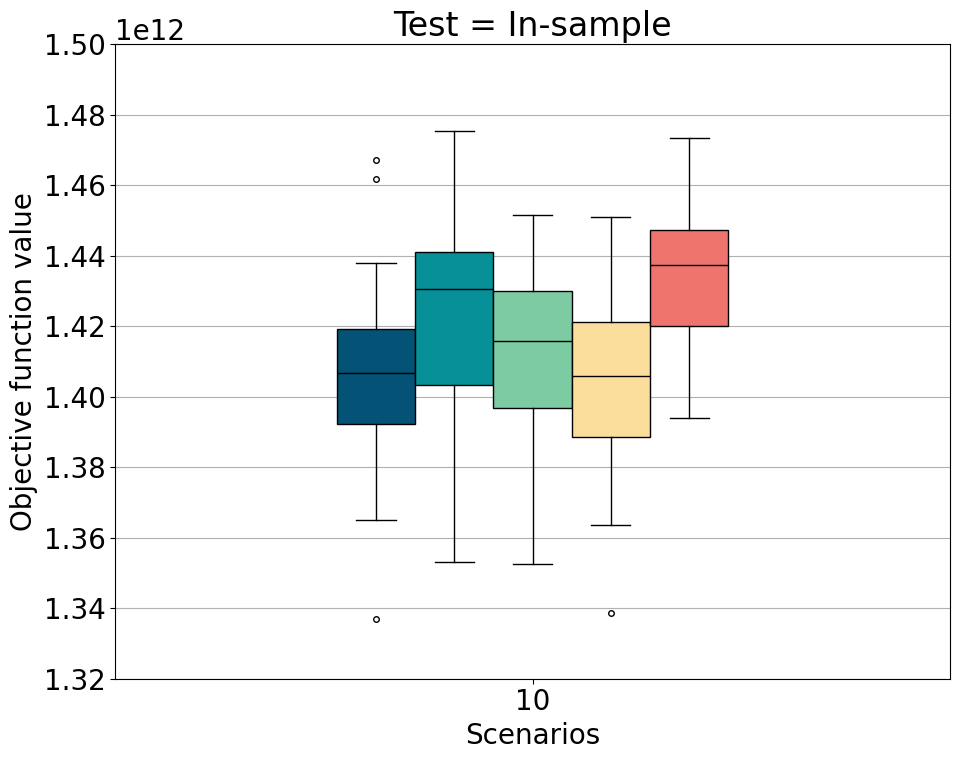

In [20]:
methods = ["basic", "moment20", "filter10", "copula20", "copula-filter10"]
#methods = ["copula-filter10", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]
#methods = ["copula-filter5", "copula-filter10", "copula-filter25", "copula-filter100"]
num_scenarios = [10]

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            dataframes = [pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}/{i}/results_objective.csv") for i in range(1, 31)]
            instance_values = [float(df_obj_value.columns[0].split(":")[1]) for df_obj_value in dataframes]
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Define positions for each boxplot
positions = [i for i in range(1, len(num_scenarios) + 1)]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_objective_values):
    plt.boxplot(data, positions=[pos + i*0.15 - 0.3 for pos in positions], widths=0.15, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT[methods[i]][1]), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = In-sample')
plt.ylim(1.32*10**12, 1.5*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT[methods[i]][1], label=SGR_TO_COLOR_AND_TEXT[methods[i]][0]) for i in range(len(methods))]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the layout to make consistent across plots
plt.savefig(f"Boxplots/In-sample-{num_scenarios}", bbox_inches="tight")
plt.show()

### OOS boxplots

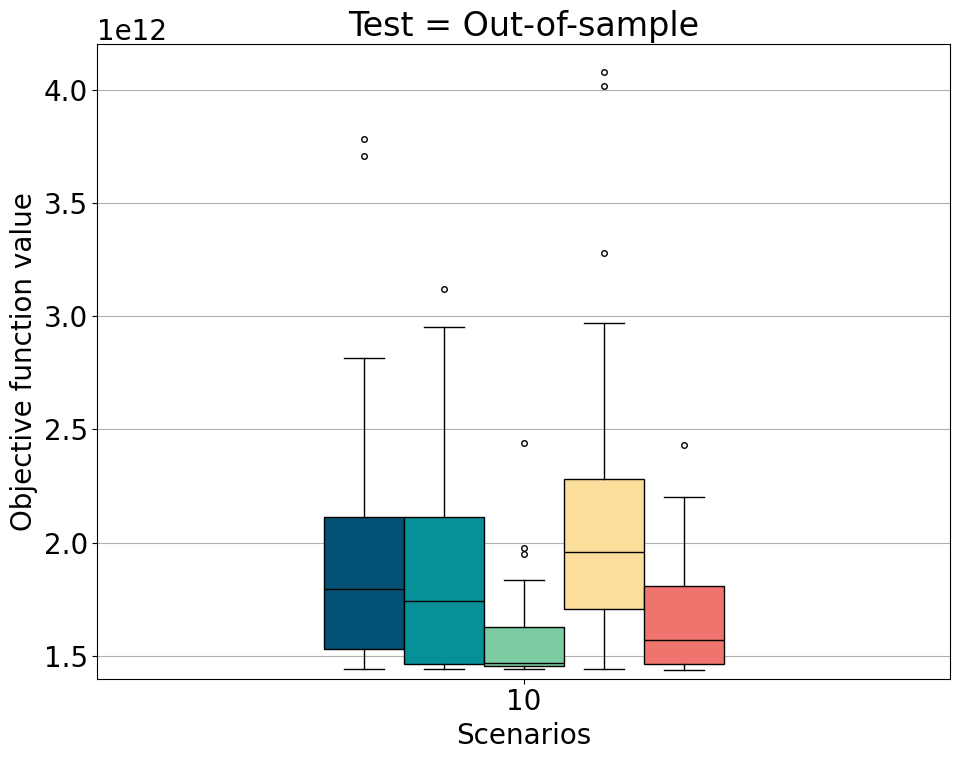

In [21]:
methods = ["basic", "moment20", "filter10", "copula20", "copula-filter10"]
#methods = ["copula-filter10", "copula-filter-wind10", "copula-filter-solar10", "copula-filter-combo10"]
#num_scenarios = [50, 100]
#methods = ["copula-filter5", "copula-filter10", "copula-filter25", "copula-filter100"]
num_scenarios = [10]

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            instance_values = []
            for i in range(1, 31):
                base_path = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(ns)}_{i}/"
                oos_values_for_inst = []
                for j in range(1, 11):
                    path_to_df = base_path + f"oos_tree{j}/out_of_sample_values.csv"
                    try:
                        df_oos_value = pd.read_csv(path_to_df)
                        oos_value = float(df_oos_value["Objective value"][0])
                        oos_values_for_inst.append(oos_value)
                    except FileNotFoundError:
                        continue
                instance_values.append(sum(oos_values_for_inst) / len(oos_values_for_inst))
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Define positions for each boxplot
positions = [i for i in range(1, len(num_scenarios) + 1)]

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
for i, data in enumerate(all_objective_values):
    plt.boxplot(data, positions=[pos + i*0.15 - 0.3 for pos in positions], widths=0.15, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT[methods[i]][1]), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = Out-of-sample')
plt.ylim(1.4*10**12, 4.2*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT[methods[i]][1], label=SGR_TO_COLOR_AND_TEXT[methods[i]][0]) for i in range(len(methods))]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.tight_layout(rect=[0, 0, 1, 1])  # Adjust the layout to make consistent across plots
plt.savefig(f"Boxplots/OOS-{num_scenarios}", bbox_inches="tight")
plt.show()

### Test filter10_sce100_1 outlier

#### Generators

/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_71580/564191921.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
/var/folders/rd/zf3y09wj69n3q6493fx5jmtr0000gn/T/ipykernel_71580/564191921.py:62: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)


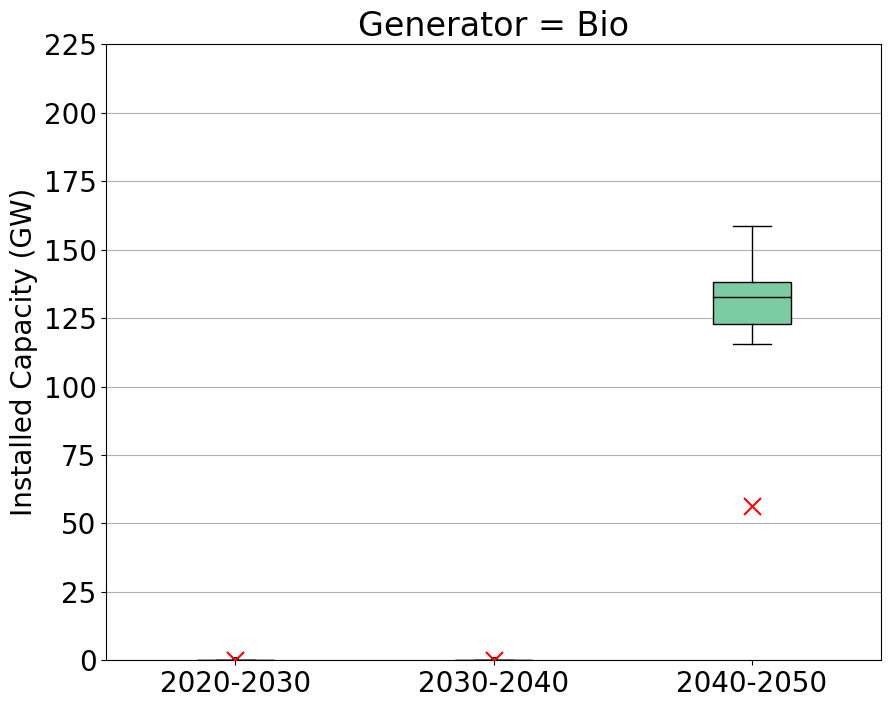

In [45]:
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import pandas as pd

# All fossil types
FOSSIL_TYPES = ['Liginite existing',
'Lignite',
'Lignite CCS adv',
'Coal existing',
'Coal',
'Coal CCS adv',
'Gas existing',
'Gas OCGT',
'Gas CCGT',
'Gas CCS adv',
'Oil existing',
#'Bio existing',
#'Bio 10 cofiring',
#'Nuclear',
#'Bio',
#'Geo',
#'Bio 10 cofiring CCS',
'Lignite CCS sup',
'Coal CCS',
'Gas CCS']
#'Waste']

# Remove whitespace from strings in the list
FOSSIL_TYPES = [fossil.replace(" ", "") for fossil in FOSSIL_TYPES]

FOSSIL = False

genType = 'Bio'
methods = ["filter10"]
num_scenarios = 100

def get_dataframes(methods, num_scenarios):
    dataframes = []
    for method in methods: 
        dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(num_scenarios)}/{i}/results_output_gen.csv") for i in range(2, 31)])
    # The outlier
    dataframes.append([pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{methods[0]}/{str(num_scenarios)}/1/results_output_gen.csv")])
    return dataframes

def aggregate_dataframes(dataframes):
    # Initialize empty DataFrames to store the aggregated installed capacity values for each method and period
    aggregated_data = pd.DataFrame(columns=['Period', 'genInstalledCap_MW'])

    # Iterate through the dataframes for method
    for df in dataframes:
        # Filter the dataframe for GeneratorType genType
        if FOSSIL:
            filtered_data = df[df['GeneratorType'].isin(FOSSIL_TYPES)]
        else: 
            filtered_data = df[df['GeneratorType'] == genType]
        
        # Group the filtered data by period and sum the installed capacity values within each group
        grouped_data = filtered_data.groupby('Period')['genInstalledCap_MW'].sum().reset_index()
        
        # Concatenate the grouped data with the aggregated DataFrame for Method 1
        aggregated_data= pd.concat([aggregated_data, grouped_data], ignore_index=True)
    
    # Convert MW to GW
    aggregated_data['genInstalledCap_GW'] = aggregated_data['genInstalledCap_MW'] / 1000
    return aggregated_data

all_dataframes = get_dataframes(methods, num_scenarios)
aggregated_dataframes = [aggregate_dataframes(dfs) for dfs in all_dataframes]
all_aggregated_data = [aggregated_data['genInstalledCap_GW'].groupby(aggregated_data['Period']).apply(list) for aggregated_data in aggregated_dataframes]


plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Extract outlier data
outlier_data = all_aggregated_data[1]
outlier_positions = [1, 2, 3]

# Plot the outliers
for period, value, pos in zip(outlier_data.index, outlier_data, outlier_positions):
    plt.scatter([pos], value, color='red', marker='x', s=150, label=f'Outlier for {period}', zorder=999)

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

# Create boxplots for each method and period
plt.boxplot(all_aggregated_data[0], widths=0.3, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT["filter10"][1]), medianprops=medianlineprops, flierprops=flierprops)


# Add labels and title
plt.ylabel('Installed Capacity (GW)')
plt.title(f'Generator = {'Fossil' if FOSSIL else GENERATOR_TO_TEXT[genType]}')
plt.grid(axis="y")
plt.ylim(0, 225)

# Customize x-axis labels
plt.xticks(range(1, 4), ['2020-2030', '2030-2040', '2040-2050'])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT["filter10"][1], label=f"{SGR_TO_COLOR_AND_TEXT["filter10"][0]} excl. outlier"), mlines.Line2D([], [], color='red', marker='x', linestyle="None", label='The outlier')]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/Outlier-filter10-{'Fossil' if FOSSIL else genType}")
plt.show()

#### OOS

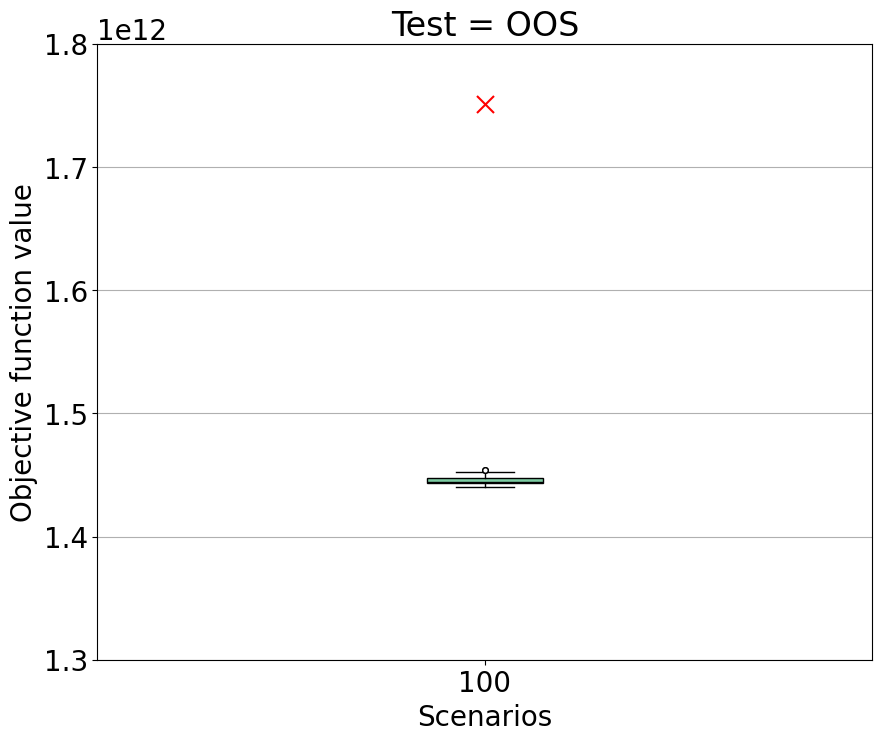

In [8]:
#methods = ["basic", "filter10", "moment20", "copula20", "copula-filter10"]
methods = ["filter10"]
num_scenarios = [100]

outlier_value = []

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            instance_values = []
            for i in range(1, 31):
                base_path = f"NewOOS/dataset_europe_agg_v50/{method}_sce{str(ns)}_{i}/"
                oos_values_for_inst = []
                for j in range(1, 11):
                    path_to_df = base_path + f"oos_tree{j}/out_of_sample_values.csv"
                    try:
                        df_oos_value = pd.read_csv(path_to_df)
                        oos_value = float(df_oos_value["Objective value"][0])
                        oos_values_for_inst.append(oos_value)
                    except FileNotFoundError:
                        continue
                if i == 1:
                    outlier_value.append(sum(oos_values_for_inst) / len(oos_values_for_inst))
                else:
                    instance_values.append(sum(oos_values_for_inst) / len(oos_values_for_inst))
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Plot the outliers
plt.scatter([1], outlier_value, color='red', marker='x', s=150, label=f'Outlier for {period}', zorder=999)

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

plt.boxplot(all_objective_values[0], widths=0.15, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT["filter10"][1]), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = OOS')
plt.ylim(1.3*10**12, 1.8*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT["filter10"][1], label=f"{SGR_TO_COLOR_AND_TEXT["filter10"][0]} excl. outlier"), mlines.Line2D([], [], color='red', marker='x', linestyle="None", label='The outlier')]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/Outlier-filter10-OOS")
plt.show()

#### In-sample

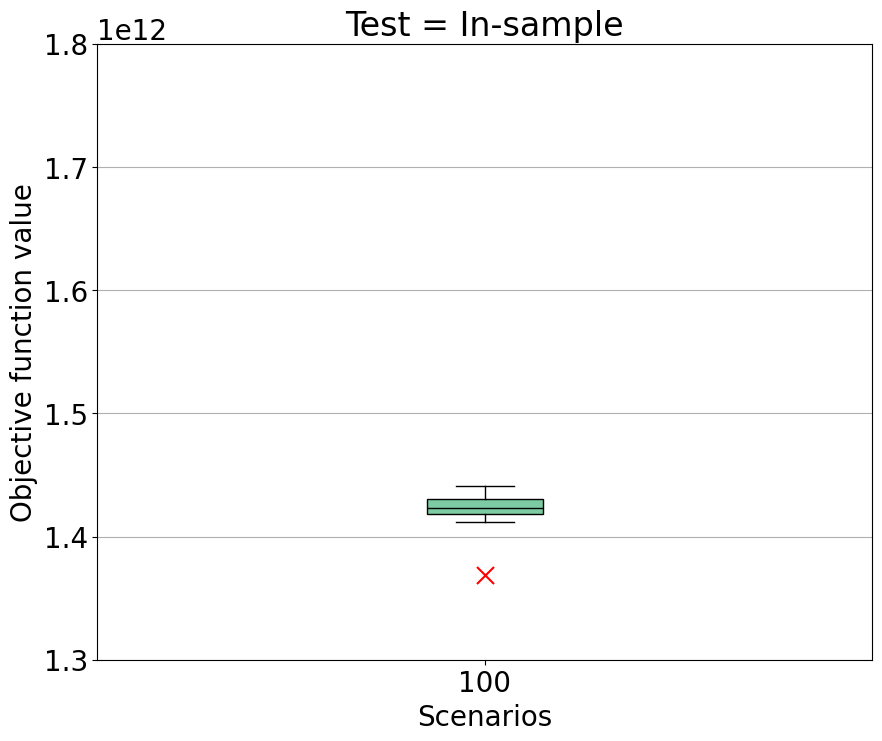

In [9]:
methods = ["filter10"]
num_scenarios = [100]

outlier_value = []

def get_objective_values(methods, num_scenarios):
    objective_values = []
    for method in methods:
        obj_by_method = []
        for ns in num_scenarios:
            dataframes = []
            for i in range(1, 31):
                if i == 1:
                    outlier = pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}/{i}/results_objective.csv")
                    outlier_value.append(float(outlier.columns[0].split(":")[1]))
                else:
                    dataframes.append(pd.read_csv(f"NewResults/run_in_sample/dataset_europe_agg_v50/{method}/{str(ns)}/{i}/results_objective.csv"))
            instance_values = [float(df_obj_value.columns[0].split(":")[1]) for df_obj_value in dataframes]
            obj_by_method.append(instance_values)
        objective_values.append(obj_by_method)
    return objective_values

all_objective_values = get_objective_values(methods, num_scenarios)

plt.rcParams.update({'font.size': 20})
fig = plt.figure(figsize=(10, 8))

# Plot the outliers
plt.scatter([1], outlier_value, color='red', marker='x', s=150, label=f'Outlier for {period}', zorder=999)

# Define properties for the median lines
medianlineprops = dict(color='black', linewidth=1)

# Define properties for the outlier marks
flierprops = dict(marker='o', markerfacecolor='white', markersize=4)

plt.boxplot(all_objective_values[0], widths=0.15, patch_artist=True, boxprops=dict(facecolor=SGR_TO_COLOR_AND_TEXT["filter10"][1]), medianprops=medianlineprops, flierprops=flierprops)

# Add labels and title
plt.xlabel("Scenarios")
plt.ylabel('Objective function value')
plt.title(f'Test = In-sample')
plt.ylim(1.3*10**12, 1.8*10**12)
plt.grid(axis="y")

# Customize x-axis labels
plt.xticks(range(1, len(num_scenarios) + 1), [ns for ns in num_scenarios])

# Create custom legend for different groups (methods)
legend_handles = [mpatches.Patch(color=SGR_TO_COLOR_AND_TEXT["filter10"][1], label=f"{SGR_TO_COLOR_AND_TEXT["filter10"][0]} excl. outlier"), mlines.Line2D([], [], color='red', marker='x', linestyle="None", label='The outlier')]
#plt.legend(handles=legend_handles)

# Show/save the plot
plt.savefig(f"Boxplots/Outlier-filter10-In-sample")
plt.show()